#### Classifying neurons with/without autapse

Simulations of the various test carried out to classify neurons.

Class I: action potentials can be generated with arbitrarily low frequency.

Class II: action potentials fire in a band of frequencies.

Class III: A single action potential is generated in response to a step current.

Test 1: Apply various step currents for a set of parameters and plot the steady-state F-I curve. Class I - continuous; Class II - discontinuous; Class III - does not exist.

Test 2: Slow ramp current, Class I will exhibit significant changes in firing frequency; Class II will stay relatively constant; Class III does not fire.



In [1]:
import sys
sys.path.append("..\\") # parent directory
from AQUA_general import AQUA
from batchAQUA_general import batchAQUA
from stimulus import *
from plotting_functions import *
from functions import *

import numpy as np
import matplotlib.pyplot as plt

In [2]:
"""
# RS neuron with no autapse
RS =  {'a': 0.02, 'b': 0.2,  'c': -65, 'd': 8,    'e': 0.2, 'f': 6.0, 'tau': 2.0, 'E_syn': 0.0}
IB =  {'a': 0.02, 'b': 0.2,  'c': -55, 'd': 4,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
LTS = {'a': 0.02, 'b': 0.25, 'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
FS =  {'a': 0.1,  'b': 0.2,  'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
TC =  {'a': 0.02, 'b': 0.25, 'c': -65, 'd': 0.05, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
RZ =  {'a': 0.1,  'b': 0.26, 'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
CH =  {'a': 0.02, 'b': 0.2,  'c': -50, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}


class_I = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
class_I_E_autapse = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.3, 'f': 3.0, 'tau': 1.0, 'E_syn': 0.0}
class_I_I_autapse = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.3, 'f': -3.0, 'tau': 1.0, 'E_syn': 0.0}

class_II = {'a': 0.2, 'b': 0.26,  'c': -65, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
class_II_E_autapse = {'a': 0.2, 'b': 0.26,  'c': -65, 'd': 0, 'e': 0.3, 'f': 3.0, 'tau': 1.0, 'E_syn': 0.0}
class_II_I_autapse = {'a': 0.2, 'b': 0.26,  'c': -65, 'd': 0, 'e': 0.3, 'f': -3.0, 'tau': 1.0, 'E_syn': 0.0}

bistable = {'a': 1.0, 'b': 1.5,  'c': -60, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}
"""

"\n# RS neuron with no autapse\nRS =  {'a': 0.02, 'b': 0.2,  'c': -65, 'd': 8,    'e': 0.2, 'f': 6.0, 'tau': 2.0, 'E_syn': 0.0}\nIB =  {'a': 0.02, 'b': 0.2,  'c': -55, 'd': 4,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nLTS = {'a': 0.02, 'b': 0.25, 'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nFS =  {'a': 0.1,  'b': 0.2,  'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nTC =  {'a': 0.02, 'b': 0.25, 'c': -65, 'd': 0.05, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nRZ =  {'a': 0.1,  'b': 0.26, 'c': -65, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nCH =  {'a': 0.02, 'b': 0.2,  'c': -50, 'd': 2,    'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\n\n\nclass_I = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.0, 'f': 0.0, 'tau': 0.0, 'E_syn': 0.0}\nclass_I_E_autapse = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.3, 'f': 3.0, 'tau': 1.0, 'E_syn': 0.0}\nclass_I_I_autapse = {'a': 0.02, 'b': -0.1,  'c': -55, 'd': 6, 'e': 0.3, 'f': 

In [3]:
def FI_curves(batch, neuron, x_start, t_start, I_range, N_iter, dt):
    # 1st test for RS neuron
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    # step currents with steady-state frequencies plotted
    batch.Initialise(x_start, t_start)
    I_h, steady_state = FI_from_steps(batch, I_range, N_iter, dt)
    plt.scatter(I_h, steady_state, s = 1.5, label = 'step currents')
    #plt.ylim([0, max(steady_state)])

    # ramp current
    neuron.Initialise(x_start[0, :], t_start[0])
    I_spike_up, freq_up, X, T, I_inj = FI_from_ramps(neuron, I_range, 10*N_iter, dt)
    plt.scatter(I_spike_up[2:], freq_up[2:], s = 1.5, label = 'ramp current')


    # reverse ramp
    neuron.Initialise(x_start[0, :], t_start[0])
    I_spike_down, freq_down, X, T, I_inj = FI_from_ramps(neuron, [I_range[1], I_range[0]], 10*N_iter, dt)
    plt.scatter(I_spike_down[2:], freq_down[2:], s = 1.5, label = 'reverse ramp current')


    # plot
    ax.set_title(f"F-I curve for {neuron.get_params()['name']} izhikevich neuron")
    #ax.set_title(neuron.get_params())
    ax.set_xlabel("Injected Current [pA]")
    ax.set_xlim(0, 200)
    ax.set_ylabel("Frequency [Hz]")

    return fig, ax, I_h, steady_state, I_spike_up, freq_up, I_spike_down, freq_down


In [4]:
def instantFI_curves(batch, neuron, x_start, t_start, I_range, N_iter, dt):
    # 1st test for RS neuron
    fig, ax = plt.subplots(1, 1, figsize = (8, 8))

    # step currents with steady-state frequencies plotted
    batch.Initialise(x_start, t_start)
    I_h, instant = instant_FI_from_steps(batch, I_range, N_iter, dt)
    plt.scatter(I_h, instant, s = 1.5, label = 'step currents')
    #plt.ylim([0, max(steady_state)])

    # ramp current
    neuron.Initialise(x_start[0, :], t_start[0])
    I_spike_up, freq_up, X, T, I_inj = FI_from_ramps(neuron, I_range, 10*N_iter, dt)
    plt.scatter(I_spike_up[2:], freq_up[2:], s = 1.5, label = 'ramp current')


    # reverse ramp
    neuron.Initialise(x_start[0, :], t_start[0])
    I_spike_down, freq_down, X, T, I_inj = FI_from_ramps(neuron, [I_range[1], I_range[0]], 10*N_iter, dt)
    plt.scatter(I_spike_down[2:], freq_down[2:], s = 1.5, label = 'reverse ramp current')


    # plot
    ax.set_title(f"Instantaneous F-I curve for {neuron.get_params()['name']} izhikevich neuron")
    #ax.set_title(neuron.get_params())
    ax.set_xlabel("Injected Current [pA]")
    ax.set_xlim(0, 200)
    ax.set_ylabel("Frequency [Hz]")

    return fig, ax, I_h, instant, I_spike_up, freq_up, I_spike_down, freq_down

In [5]:

FS = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.0, 'f': 0.0, 'tau': 0.0}

FS_E = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': 10.0, 'tau': 0.5}

FS_I = {'name': 'FS', 'C': 20, 'k': 1, 'v_r': -55, 'v_t': -40, 'v_peak': 25,
     'a': 0.2, 'b': -2, 'c': -45, 'd': 0, 'e': 0.03, 'f': -10.0, 'tau': 0.5}

SAVE_FIGS = False


N_models = 100

params_list = []
params_list_E = []
params_list_I = []

x_ini = np.array([-65, 0., 0.])
t_ini = 0.0
x_start = np.zeros((N_models, 3))
t_start = np.zeros(N_models)

# change the neuron dictionary here.
for i in range(N_models):
    params_list.append(FS)
    params_list_E.append(FS_E)
    params_list_I.append(FS_I)
    x_start[i] = x_ini
    t_start[i] = t_ini

# simulation duration
T = 2000
dt = 0.01
N_iter = int(T/dt)
I_range = [50, 200]     # Class 1
#I_range = [2, 4]     # Class 2

#initialise batch
batch = batchAQUA(params_list)
batch_E = batchAQUA(params_list_E)
batch_I = batchAQUA(params_list_I)

neuron = AQUA(FS)
neuron_E = AQUA(FS_E)
neuron_I = AQUA(FS_I)


100%|██████████| 199999/199999 [01:50<00:00, 1806.96it/s]
c:\Users\liamm\anaconda3\Lib\site-packages\numpy\core\fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
c:\Users\liamm\anaconda3\Lib\site-packages\numpy\core\_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 1999999/1999999 [01:38<00:00, 20351.67it/s]


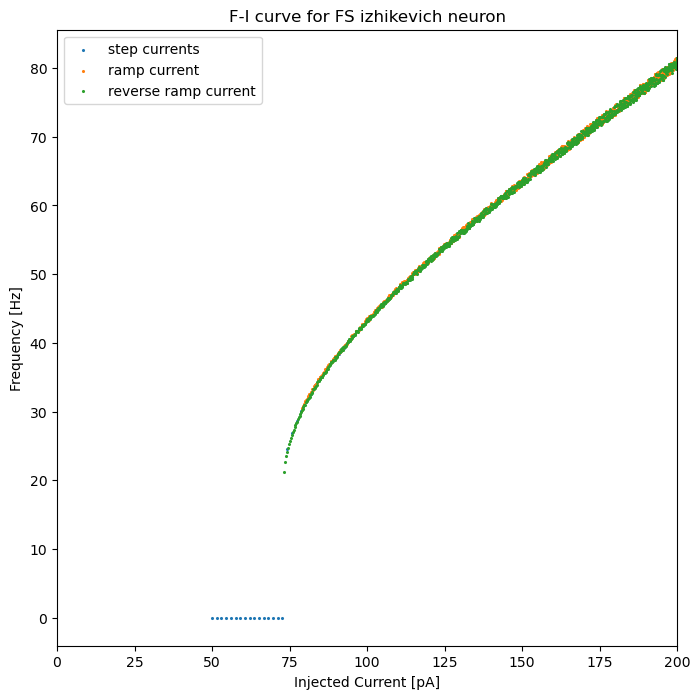

In [6]:
fig, ax, I_h, steady_FS, ramp_up_FS, freq_up_FS, ramp_down_FS, freq_down_FS = FI_curves(batch, neuron, x_start, t_start, I_range, N_iter, dt)
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\NoAutapse_allcurves.png")


100%|██████████| 1999999/1999999 [01:51<00:00, 17939.14it/s]


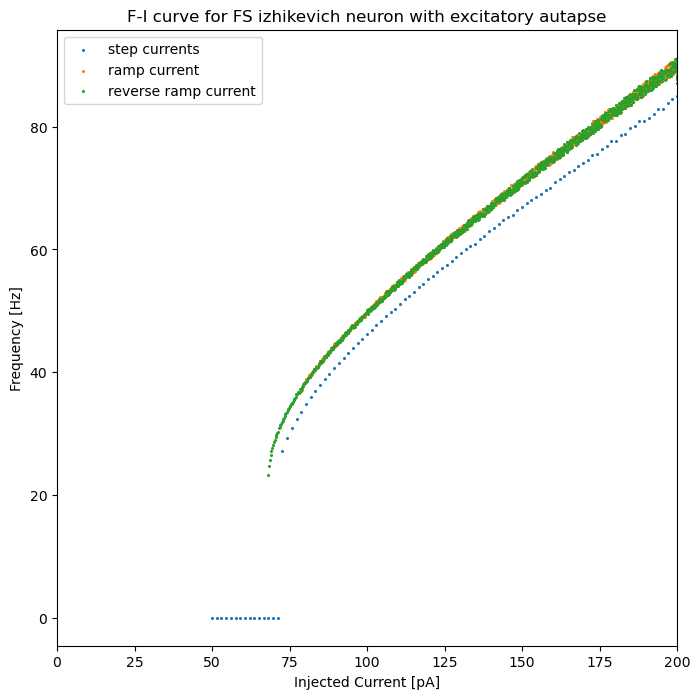

In [7]:
fig, ax, I_h, steady_FS_E, ramp_up_FS_E, freq_up_FS_E, ramp_down_FS_E, freq_down_FS_E = FI_curves(batch_E, neuron_E, x_start, t_start, I_range, N_iter, dt)
ax.set_title("F-I curve for FS izhikevich neuron with excitatory autapse")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\ExcAutapse_allcurves.png")

100%|██████████| 1999999/1999999 [01:29<00:00, 22283.83it/s]


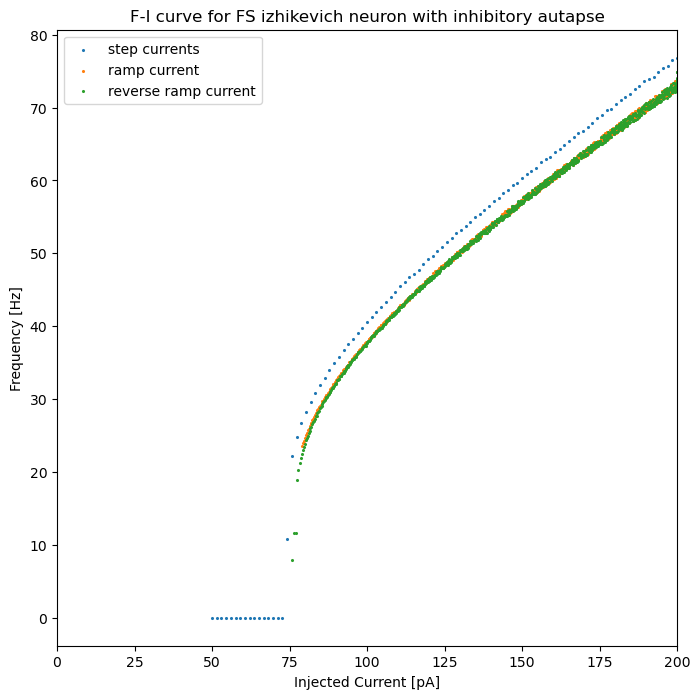

In [8]:
fig, ax, I_h, steady_FS_I, ramp_up_FS_I, freq_up_FS_I, ramp_down_FS_I, freq_down_FS_I = FI_curves(batch_I, neuron_I, x_start, t_start, I_range, N_iter, dt)
ax.set_title("F-I curve for FS izhikevich neuron with inhibitory autapse")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\InhAutapse_allcurves.png")

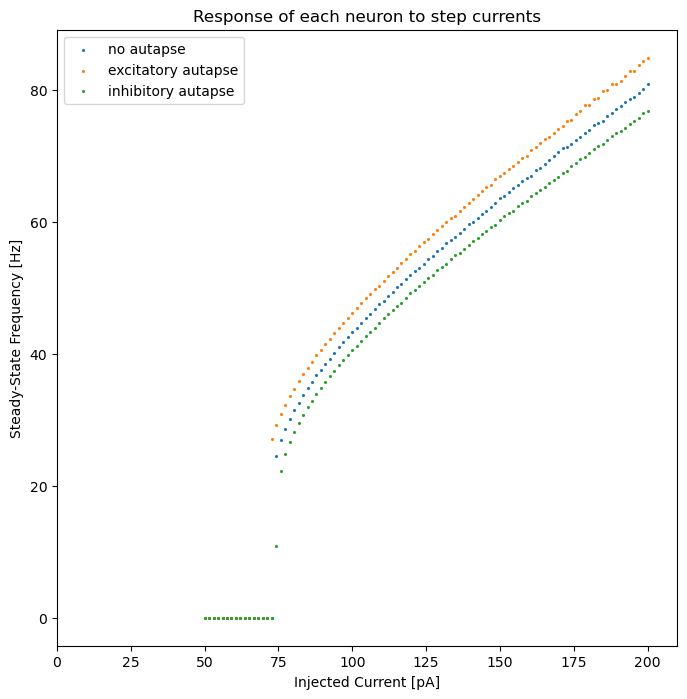

In [9]:
# PLot results for all neurons to the step current
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
plt.scatter(I_h, steady_FS, s = 1.5, label = 'no autapse')
plt.scatter(I_h, steady_FS_E, s = 1.5, label = 'excitatory autapse')
plt.scatter(I_h, steady_FS_I, s = 1.5, label = 'inhibitory autapse')

# plot
ax.set_title("Response of each neuron to step currents")
ax.set_xlabel("Injected Current [pA]")
ax.set_xlim(0, 210)
ax.set_ylabel("Steady-State Frequency [Hz]")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\AllNeurons_SteadyStep.png")

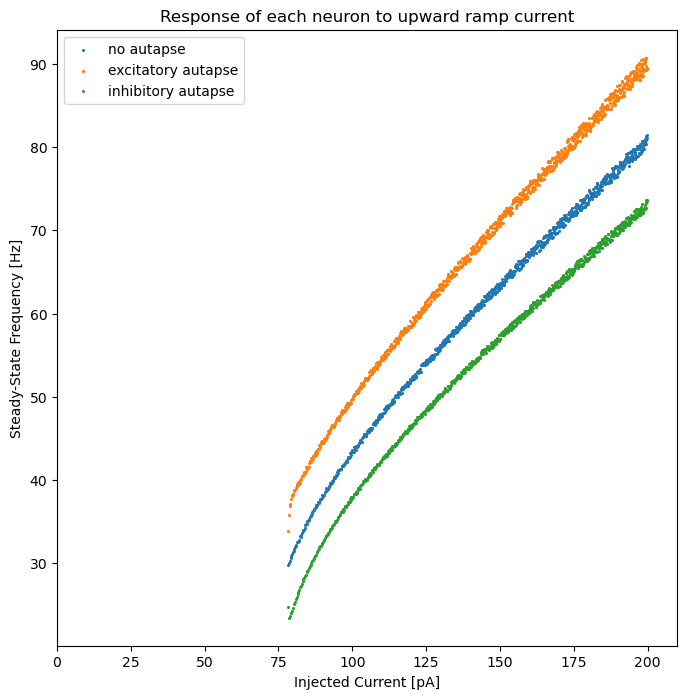

In [10]:
# Plot results for all neurons to the up ramp current
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
plt.scatter(ramp_up_FS, freq_up_FS, s = 1.5, label = 'no autapse')
plt.scatter(ramp_up_FS_E, freq_up_FS_E, s = 1.5, label = 'excitatory autapse')
plt.scatter(ramp_up_FS_I, freq_up_FS_I, s = 1.5, label = 'inhibitory autapse')

# plot
ax.set_title("Response of each neuron to upward ramp current")
ax.set_xlabel("Injected Current [pA]")
ax.set_xlim(0, 210)
ax.set_ylabel("Steady-State Frequency [Hz]")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\AllNeurons_UpRamp.png")

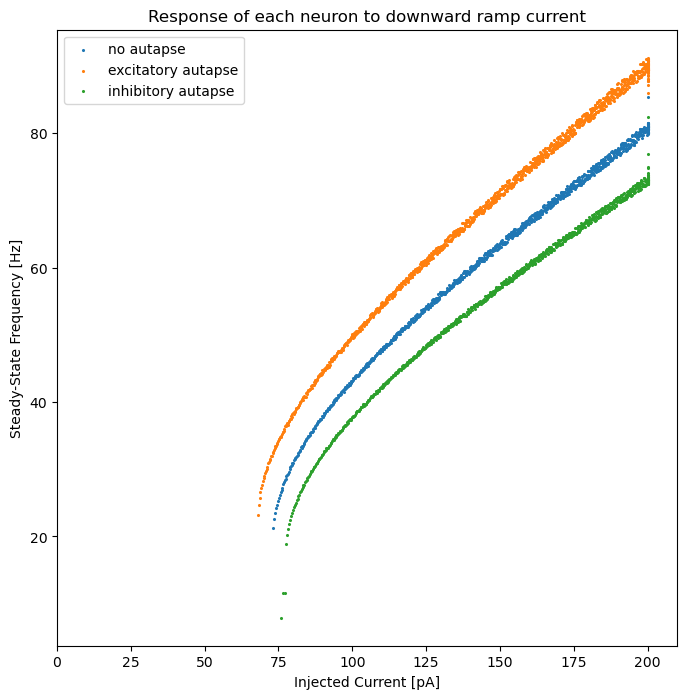

In [11]:
# Plot results for all neurons to the down ramp current
fig, ax = plt.subplots(1, 1, figsize = (8, 8))
plt.scatter(ramp_down_FS, freq_down_FS, s = 1.5, label = 'no autapse')
plt.scatter(ramp_down_FS_E, freq_down_FS_E, s = 1.5, label = 'excitatory autapse')
plt.scatter(ramp_down_FS_I, freq_down_FS_I, s = 1.5, label = 'inhibitory autapse')

# plot
ax.set_title("Response of each neuron to downward ramp current")
ax.set_xlabel("Injected Current [pA]")
ax.set_xlim(0, 210)
ax.set_ylabel("Steady-State Frequency [Hz]")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\AllNeurons_DownRamp.png")

100%|██████████| 199999/199999 [01:31<00:00, 2195.55it/s]


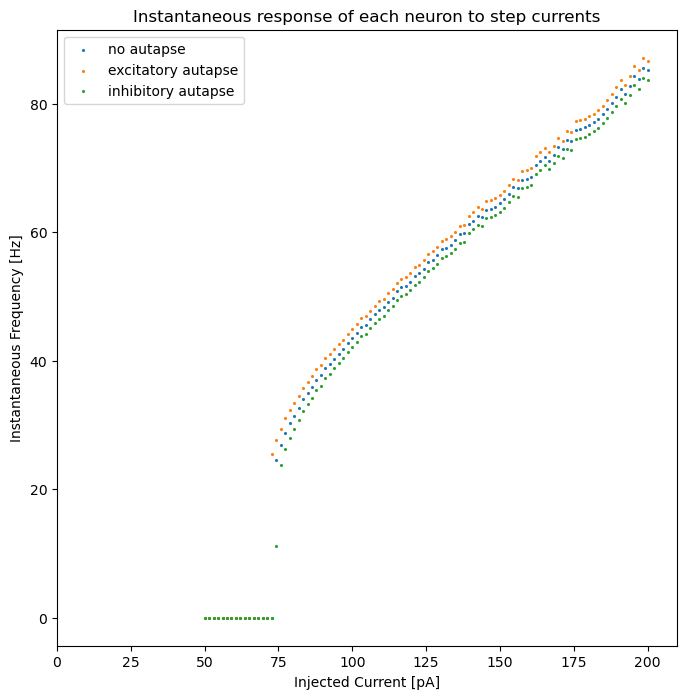

In [12]:
## Now instantaneous frequencies.

fig, ax = plt.subplots(1, 1, figsize = (8, 8))

# no autapse 
batch.Initialise(x_start, t_start)
I_h, instant = instant_FI_from_steps(batch, I_range, N_iter, dt)
plt.scatter(I_h, instant, s = 1.5, label = 'no autapse')

# excitatory autapse
batch_E.Initialise(x_start, t_start)
I_h, instant_E = instant_FI_from_steps(batch_E, I_range, N_iter, dt)
plt.scatter(I_h, instant_E, s = 1.5, label = 'excitatory autapse')

# inhibitory autapse
batch_I.Initialise(x_start, t_start)
I_h, instant_I = instant_FI_from_steps(batch_I, I_range, N_iter, dt)
plt.scatter(I_h, instant_I, s = 1.5, label = 'inhibitory autapse')

ax.set_title("Instantaneous response of each neuron to step currents")
ax.set_xlabel("Injected Current [pA]")
ax.set_xlim(0, 210)
ax.set_ylabel("Instantaneous Frequency [Hz]")
plt.legend()
if SAVE_FIGS:
    plt.savefig(".\\FS_excitability\\AllNeurons_InstantStep.png")
